In [13]:
# for regression-Regressor

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=3, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1743.6522494583496


Accuracy: 0.9101123595505618

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.91      0.89        34
           2       1.00      0.95      0.98        22

    accuracy                           0.91        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.91      0.91      0.91        89


Confusion Matrix:
[[29  4  0]
 [ 3 31  0]
 [ 0  1 21]]


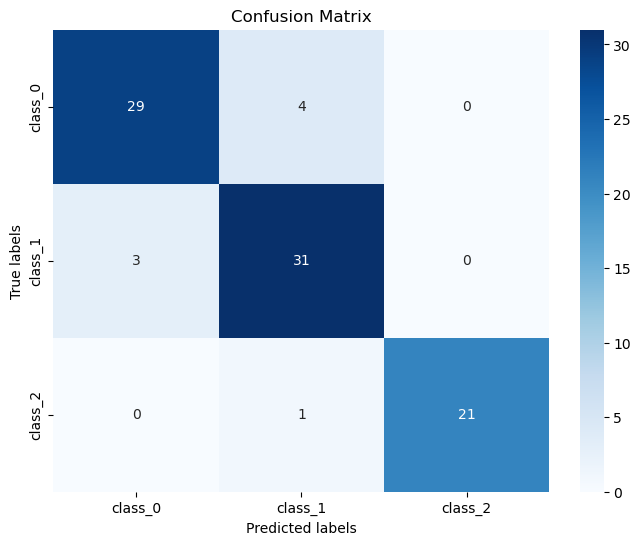

In [14]:
# for classification-Classifier

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# Create the Decision Tree Classifier
clf = DecisionTreeClassifier()


# Fit the classifier to the training data
clf.fit(X_train, y_train)


# Predict on the testing data
y_pred = clf.predict(X_test)


# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Print all the metrics like Sensitivity, specificity, F1 measure etc.

from sklearn.metrics import precision_score, recall_score, f1_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Compute sensitivity (recall)
sensitivity = TP / (TP + FN)

# Compute specificity
specificity = TN / (TN + FP)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# for average:
# None: Compute precision for each class separately. This returns a list of precision values for each class.
# 'micro': Calculate precision globally by considering the total number of true positives, false positives, and false negatives across all classes.
# 'macro': Calculate precision for each class and then take the unweighted mean of all precision values.
# 'weighted': Calculate precision for each class and then take the weighted mean of all precision values, weighted by the number of true instances for each class.
    
# Print the metrics
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1)


Sensitivity (Recall): 0.9117647058823529
Specificity: 0.8787878787878788
Precision: 0.9121800873907615
F1 Score: 0.9106608050950878


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
                            confusion_matrix, classification_report

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print accuracy, precision, recall, and F1 score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Accuracy: 0.9101123595505618
Precision: 0.9121800873907615
Recall: 0.9101123595505618
F1 Score: 0.9106608050950878
Confusion Matrix:
[[29  4  0]
 [ 3 31  0]
 [ 0  1 21]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.91      0.88      0.89        33
     class_1       0.86      0.91      0.89        34
     class_2       1.00      0.95      0.98        22

    accuracy                           0.91        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.91      0.91      0.91        89



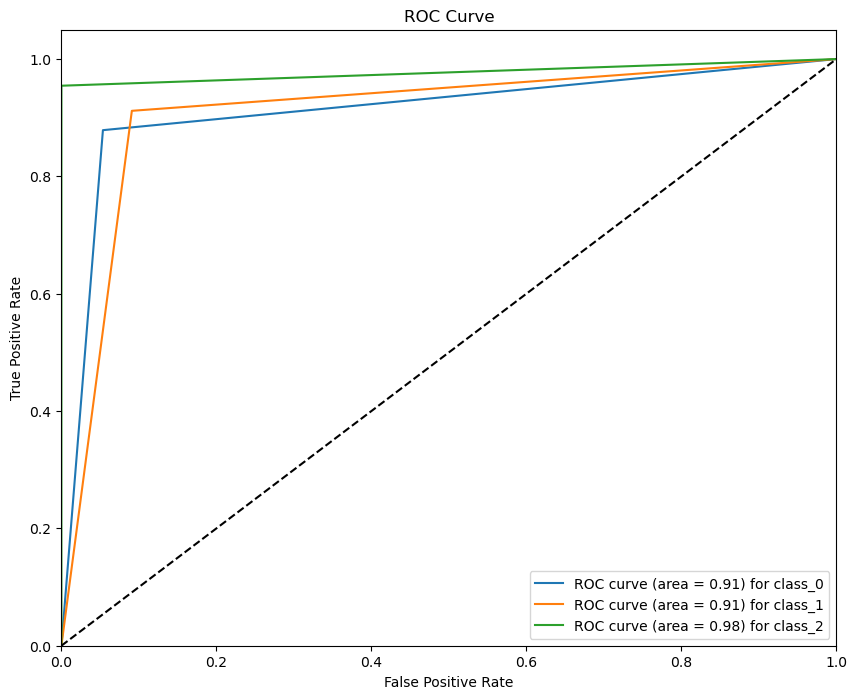

In [8]:
# Print AUC-ROC

from sklearn.metrics import roc_curve, auc

y_probas = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(wine.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probas[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(wine.target_names)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], wine.target_names[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Experiment with various train and test splitups and check its performance. 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a list of different test sizes to experiment with
test_sizes = [0.2, 0.3, 0.4, 0.5]

# Initialize an empty dictionary to store results
results = {}

# Loop over different test sizes
for test_size in test_sizes:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Initialize the Decision Tree Classifier
    clf = DecisionTreeClassifier()
    
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[test_size] = accuracy

# Print the results
print("Test Size\tAccuracy")
for test_size, accuracy in results.items():
    print(f"{test_size}\t\t{accuracy}")


Test Size	Accuracy
0.2		0.9444444444444444
0.3		0.9444444444444444
0.4		0.9305555555555556
0.5		0.9101123595505618


In [10]:
# Apply Pruning on the decision tree.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with pruning enabled
clf = DecisionTreeClassifier(ccp_alpha=0.01)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9444444444444444


In [ ]:
#  Repeat the above program by reading a dataset using CSE file. You can get datasets from UCI repository or Kaggle .

